In [102]:
import torch
from torch import nn
import torchvision.transforms as T

import cv2

import matplotlib.pyplot as plt
import numpy as np

In [2]:
conversion = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'neutral', 5:'sad', 6:'surprise'}

In [3]:
PATH = "C:\\Users\\fuchsga\\Desktop\\WebApps\\FacialAnalysisWebApp\\model2.pt"

class M5(nn.Module):
    def __init__(self, n_input=1, n_output=7, n_channel=32, drop=0.2):
        super().__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(n_input, n_channel, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(drop)
            )
        self.layer2 = nn.Sequential(
            nn.Conv2d(n_channel, 2*n_channel, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(drop)
            )
        self.layer3 = nn.Sequential(
            nn.Conv2d(2*n_channel, 2*n_channel, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(drop)
            )
        self.layer4 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024, 128)
        )
        self.layer5 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, n_output)
        )

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        return nn.functional.log_softmax(x)

device = torch.device('cpu')

model = M5()
model.load_state_dict(torch.load(PATH, map_location=device))


<All keys matched successfully>

In [4]:
filter_path = "haarcascade_frontalface_default.xml"
def detect_faces(image):
    face_cascade = cv2.CascadeClassifier(filter_path)
    bboxes = face_cascade.detectMultiScale(image, 1.3, 5)
    return bboxes

In [5]:
def draw_bounding_boxes(image, bboxes):
    for box in bboxes:
        print("\nBounding box co-ordinates =",box)
        x1, y1, w, h = box
        cv2.rectangle(image, (x1, y1), (x1+w,y1+h), (0,255,0), 4)

<function matplotlib.pyplot.show(close=None, block=None)>

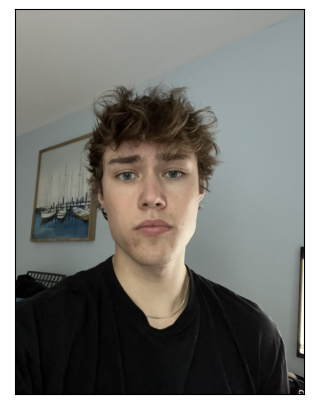

In [123]:


# to display images using matplotlib


# read image as numpy array
image = cv2.imread("me\\sad.jpg")
im_raw = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# get bounding box co-ordinates for the image
bboxes = detect_faces(image)

# draw bounding box around the face
#draw_bounding_boxes(image, bboxes)

# display the image with bounding box drawn
plt.figure(1, figsize = (20, 5))
plt.xticks([])
plt.yticks([])
plt.imshow(image)

plt.show

In [7]:
trans = T.Compose([
    T.ToPILImage(),
    T.Grayscale(1),
    T.Resize((48,48)),
    T.ToTensor()
    ])


Bounding box co-ordinates = [ 576  916 1026 1026]


C:\Users\fuchsga\AppData\Local\Temp\ipykernel_16772\2617436772.py:40: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.log_softmax(x)


<BarContainer object of 7 artists>

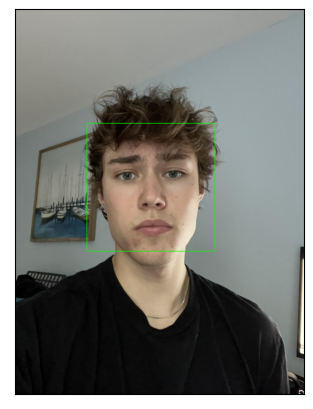

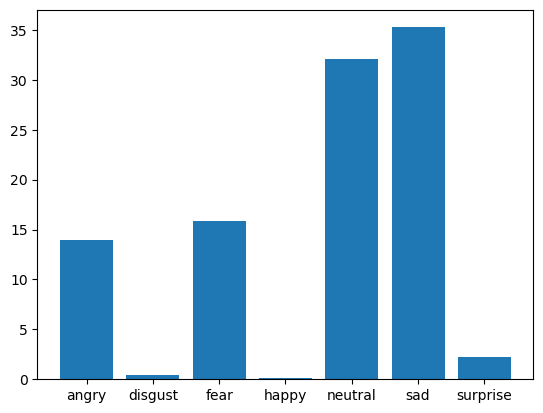

In [124]:
# read image as numpy array
image = cv2.imread("me\\sad.jpg")
im_raw = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# get bounding box co-ordinates for the image
bboxes = detect_faces(image)

# draw bounding box around the face
draw_bounding_boxes(image, bboxes)

# display the image with bounding box drawn
plt.figure(1, figsize = (20, 5))
plt.xticks([])
plt.yticks([])
plt.imshow(image)

plt.show

# assuming only one bounding box
x1, y1, w, h = bboxes[0]
im1 = im_raw[y1:y1+h,x1:x1+w]

resized_img = trans(im1)
res = model(resized_img[None,:])
print(conversion[res.argmax(dim=-1)[0].item()])

x=res.detach().numpy()
precents = np.round(100*np.exp(x[0]),2)

plt.figure(2)
labels = ['angry','disgust','fear','happy','neutral','sad','surprise']
plt.bar(labels,precents)

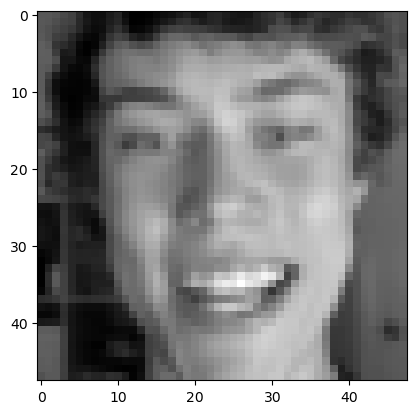

In [9]:
plt.imshow(resized_img.permute(1, 2, 0) ,cmap='gray')

<function matplotlib.pyplot.show(close=None, block=None)>

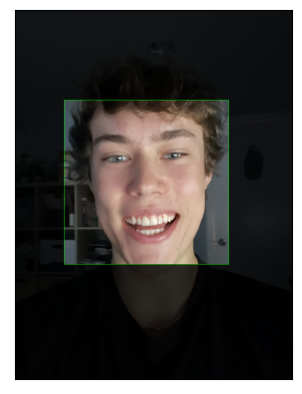

In [47]:
x1, y1, w, h = bboxes[0]
new_im = image.copy()
for y in range(len(image)):
        for x in range(len(image[0])):
            if (x < x1 or x > x1 + w) or (y < y1 or y > y1 + h):
                new_im[y][x]=new_im[y][x]/5
plt.imshow(new_im)
plt.xticks([])
plt.yticks([])
plt.show

In [39]:
import numpy as np

In [72]:
def decrease_brightness(image, p1, p2, brightness_factor):
   
    mask = np.ones_like(image)
    mask[p1[1]:p2[1], p1[0]:p2[0]] = 0

    processed_image = image * (1 - mask * brightness_factor)

    return processed_image.astype(int)

<function matplotlib.pyplot.show(close=None, block=None)>

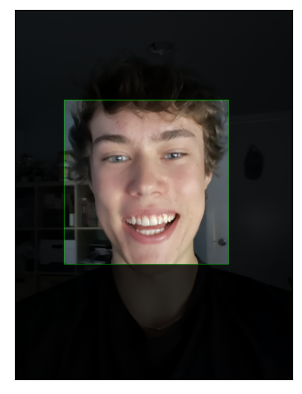

In [79]:
new_im_pro = decrease_brightness(new_im, (x1,y1), (x1+w,y1+h), 0.8)
plt.imshow(new_im_pro)
plt.xticks([])
plt.yticks([])
plt.show

numpy module use of c speeds up significantly (12.2 sec -> 0.8 sec)